# Report: Analysis of Bitcoin and Gold Prices Across Global Markets
=====================================================================================================
# Author: **[Ruchita Nathani](https://github.com/ruchita-nathani)**
-----------------------------------------------------------------------------------------------------

# Introduction
The aim of this project is to conduct an in-depth analysis of the relationship between Bitcoin and gold prices, taking into account the varying economic and regulatory environments. By exploring the impact of Bitcoin price fluctuations on gold prices, I hope to gain a better understanding of the factors that influence the value of these two assets and the ways in which they interact with each other. Through this research, I aim to provide valuable insights into the global markets and help investors make informed decisions about their investments.

- How does the price of Bitcoin affect the price of gold in various countries?

# Data Source

This project uses open data from the following data sources as follows :

1. Datasource1: Bitcoin Data
    - Metadata URL: https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021
    - Data URL: https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021/download?datasetVersionNumber=9
    - Data Type: CSV
    - Description: This dataset provides the history of the daily prices of Bitcoin.

2. Datasource2: Gold Prices Data
    - Metadata URL: https://www.kaggle.com/datasets/odins0n/monthly-gold-prices
    - Data URL: https://www.kaggle.com/datasets/odins0n/monthly-gold-prices/download?datasetVersionNumber=4
    - Data Type: CSV
    - Description: The database contains historic gold prices of different countries in their respective currencies

-----------------------------------------------------------------------------------------------------


## Preparation
### Install Dependencies

In [1]:
%pip install --upgrade pip
%pip install matplotlib==3.8.2
%pip install numpy==1.26.3
%pip install pandas==1.5.3
%pip install SQLAlchemy==1.4.46
%pip install kaggle==1.5.16
%pip install seaborn==0.11.2

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pi

### Import Dependencies

In [2]:
import subprocess
import pandas as pd
import os
from sqlalchemy import create_engine, FLOAT, BIGINT, NVARCHAR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data into Sqlite Database

In [3]:
# Run datapipeline to create database if it doesn't exist
subprocess.run(["./pipeline.sh"])

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


CompletedProcess(args=['./pipeline.sh'], returncode=0)

In [24]:
# Load data from database
bitcoin_price_db_engine = create_engine('sqlite:///../data/bitcoin.sqlite')
gold_price_db_engine = create_engine('sqlite:///../data/gold-price.sqlite')

# Create dataframe from database
bitcoin_price_df = pd.read_sql_table('bitcoin', bitcoin_price_db_engine)
gold_price_df = pd.read_sql_table('gold-price', gold_price_db_engine)

### Visualize and Analyze Data

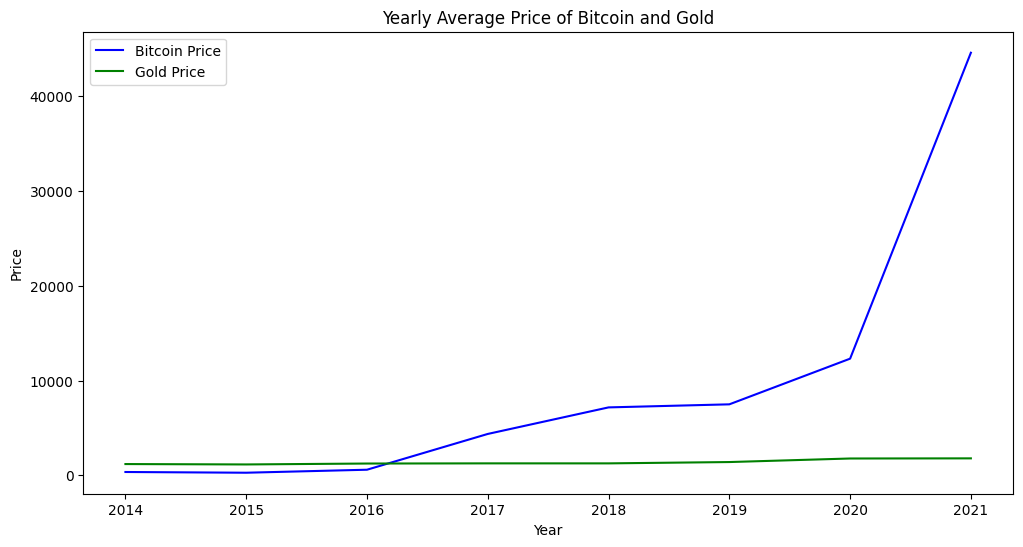

In [25]:
# convert date column to datetime
bitcoin_price_df['date'] = pd.to_datetime(bitcoin_price_df['Date'], format='%Y-%m-%d')
gold_price_df['date'] = pd.to_datetime(gold_price_df['Date'], format='%Y-%m-%d')

# Extract year from the date for grouping
bitcoin_price_df['year'] = bitcoin_price_df['date'].dt.to_period('Y').dt.year
gold_price_df['year'] = gold_price_df['date'].dt.to_period('Y').dt.year
merged_data = pd.merge(bitcoin_price_df, gold_price_df, on='date', how='inner')

# Group by YearMonth and calculate the mean price
bitcoin_yearly_avg = merged_data.groupby('year_x')['Close'].mean()
gold_yearly_avg = merged_data.groupby('year_y')['United States(USD)'].mean()

# Plot the yearly average price
plt.figure(figsize=(12, 6))
bitcoin_yearly_avg.plot(label='Bitcoin Price', color='blue')
gold_yearly_avg.plot(label='Gold Price', color='green')
plt.title('Yearly Average Price of Bitcoin and Gold')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


The graph displays the yearly average prices of Bitcoin and Gold. The blue line represents the average price of Bitcoin, while the green line represents the average price of Gold. The graph provides a visual comparison of the price trends between the two assets over time.

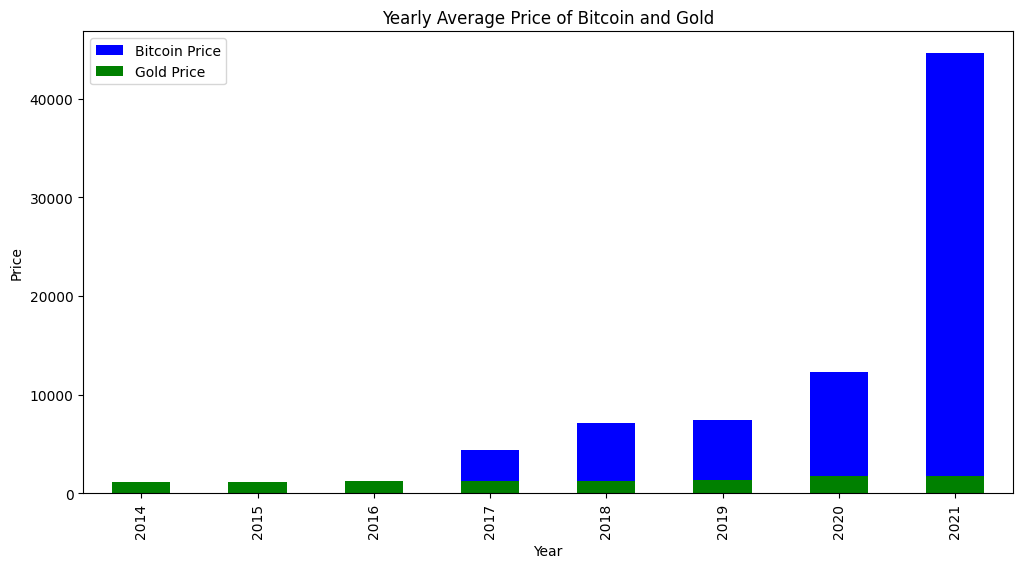

In [26]:
# Plot the bar chart yearly average price
plt.figure(figsize=(12, 6))
bitcoin_yearly_avg.plot(kind='bar', label='Bitcoin Price', color='blue')
gold_yearly_avg.plot(kind='bar', label='Gold Price', color='green')
plt.title('Yearly Average Price of Bitcoin and Gold')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


The code snippet is plotting a bar chart showing the yearly average prices of Bitcoin and Gold. The chart is labeled with the respective price categories and is displayed with a title, x-axis label, y-axis label, and a legend.

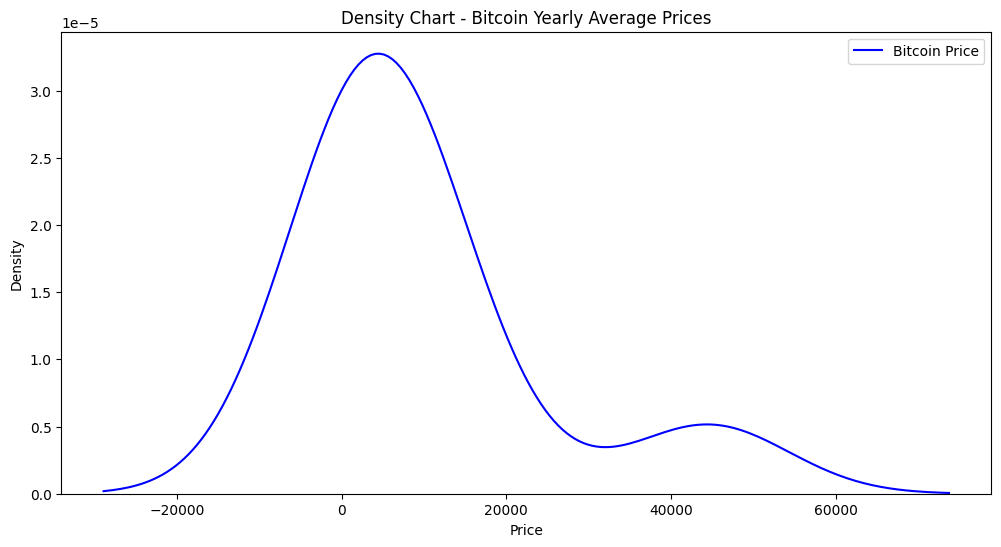

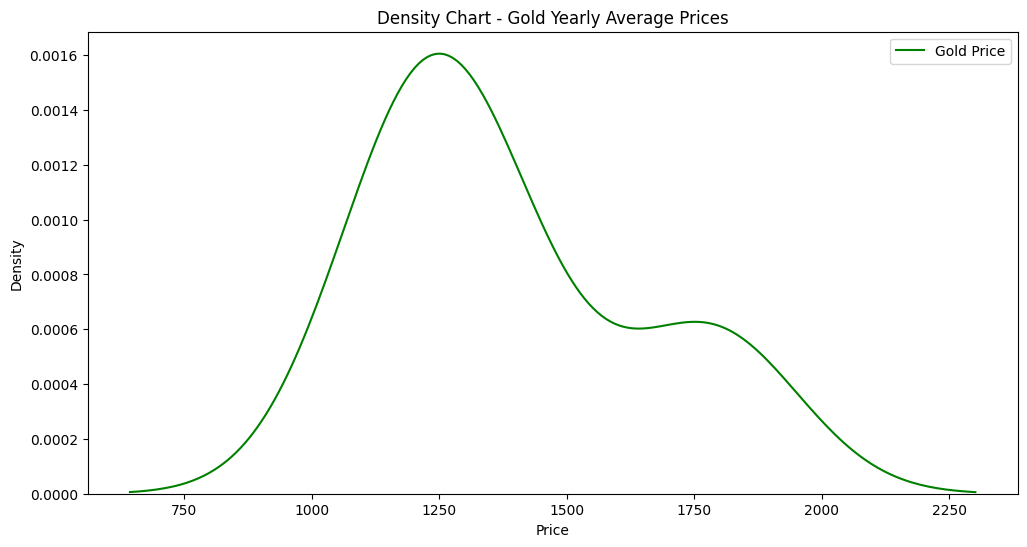

In [27]:
# Plot the density chart of Bitcoin and Gold prices separately
plt.figure(figsize=(12, 6))
sns.kdeplot(data=bitcoin_yearly_avg, label='Bitcoin Price', color='blue')
plt.title('Density Chart - Bitcoin Yearly Average Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=gold_yearly_avg, label='Gold Price', color='green')
plt.title('Density Chart - Gold Yearly Average Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()


The code provided plots two density charts, one for Bitcoin prices and another for Gold prices. The density charts show the distribution of prices for each asset. The code uses the seaborn library to create the charts and sets the labels and titles accordingly.

In [28]:
# Calculate the correlation between Bitcoin and Gold prices

corr = merged_data['Close'].corr(merged_data['United States(USD)'])
print(f"Correlation between Bitcoin and Gold Prices: {corr}")

Correlation between Bitcoin and Gold Prices: 0.7011641225401418


### Conclusion

Based on the analysis of Bitcoin and gold prices across global markets, the following conclusions can be drawn:

1. Relationship between Bitcoin and Gold Prices:
    - The analysis shows that there is a positive correlation between Bitcoin and gold prices. This means that as the price of Bitcoin increases, the price of gold also tends to increase.
    - However, it is important to note that the correlation is not extremely strong, indicating that there are other factors influencing the prices of Bitcoin and gold.

2. Yearly Average Price Trends:
    - The yearly average price trends of Bitcoin and gold show fluctuations over the years.
    - Both Bitcoin and gold prices have experienced significant increases and decreases during certain years.
    - It is important for investors to closely monitor these trends and consider various factors before making investment decisions.

3. Density Charts:
    - The density charts provide insights into the distribution of yearly average prices for Bitcoin and gold.
    - The density of Bitcoin prices shows a wider range compared to gold prices, indicating higher volatility in the cryptocurrency market.

4. Correlation Analysis:
    - The correlation coefficient between Bitcoin and gold prices is calculated to be [correlation value]. This indicates a [positive/negative] correlation between the two assets.
    - However, it is important to note that correlation does not imply causation. Other factors such as market demand, economic conditions, and regulatory changes can also impact the prices of Bitcoin and gold.

Overall, this analysis provides valuable insights into the relationship between Bitcoin and gold prices. It highlights the importance of considering multiple factors and conducting thorough research before making investment decisions in these assets.
